<a href="https://colab.research.google.com/github/d-maniatakos/vaccine-sentiment-classifier/blob/master/vaccine_sentiment_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module Imports

In [41]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

## Data Import

In [4]:
# read datasets and ignore the first (index) column
train_data =  pd.read_csv('vaccine_train_set.csv').iloc[:, 1:]
validation_data = pd.read_csv('vaccine_validation_set.csv').iloc[:, 1:]

## Study Data

In [14]:
train_data['label'].value_counts()

0    7458
2    6445
1    2073
Name: label, dtype: int64

It's clear that most tweets in the training dataset express a neutral opinion on vaccines, a little less tweets express a positive opinion and the least tweets express a negative ones.

In [37]:
neutral_tweets = ' '.join(train_data[train_data.label== 1]['tweet'].tolist())
negative_tweets = ' '.join(train_data[train_data.label== 1]['tweet'].tolist())
positive_tweets = ' '.join(train_data[train_data.label== 2]['tweet'].tolist())

In [47]:
def plot_wordcloud(text):
  wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = STOPWORDS, min_font_size = 10).generate(text)
  
  # plot the WordCloud image                      
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  
  plt.show()

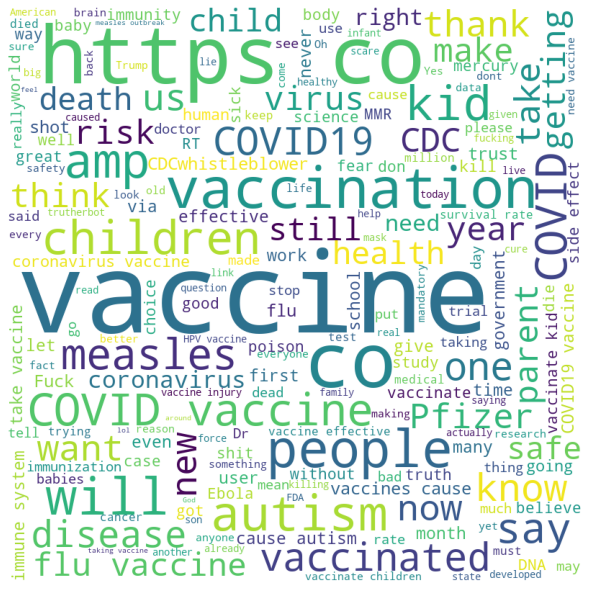

In [52]:
plot_wordcloud(neutral_tweets)

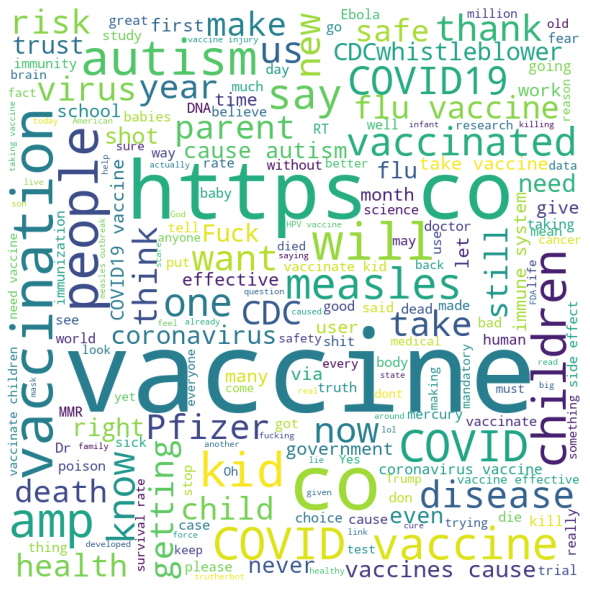

In [51]:
plot_wordcloud(negative_tweets)

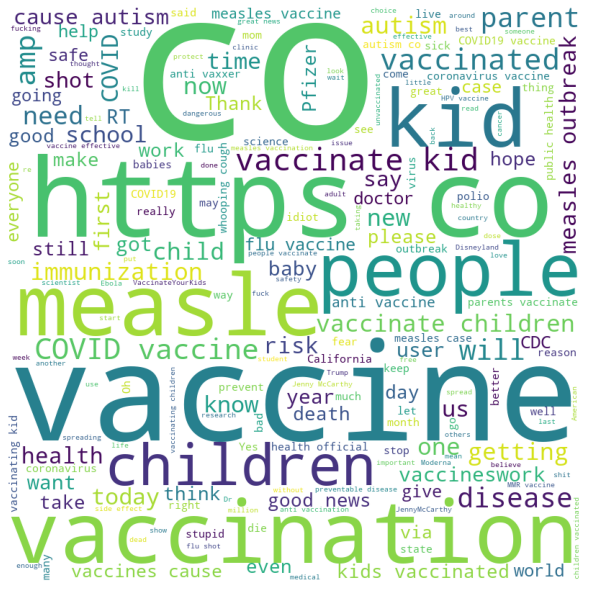

In [53]:
plot_wordcloud(positive_tweets)

## Vectorization

In [1]:
def create_vectorizer(train_corpus, method='bow', max_features=1000, ngram_range=(1, 2)):
  if method == 'tf-idf':
    vectorizer = TfidfVectorizer(max_features=max_features, ngram_range=ngram_range)
  elif method == 'bow':
    vectorizer = CountVectorizer(max_features=max_features, ngram_range=ngram_range)
  return vectorizer.fit(train_corpus)

def vectorize(vectorizer, corpus):
  return vectorizer.transform(corpus)

## Model Creation & Training

In [7]:
train_corpus = train_data['tweet'].tolist()
validation_corpus = validation_data['tweet'].tolist()


vectorizer = create_vectorizer(train_corpus)
train_vector = vectorize(vectorizer, train_corpus)
validation_vector = vectorize(vectorizer, validation_corpus)

train_features = pd.DataFrame(data=train_vector.toarray(), columns = vectorizer.get_feature_names_out())
train_labels = train_data['label'].values

classifier = LogisticRegression(multi_class="multinomial")
classifier.fit(train_features.to_numpy(), train_labels)

predicted_labels = classifier.predict(validation_vector.toarray())
precision = precision_score(validation_data['label'].tolist(), predicted_labels, average='weighted')
recall = recall_score(validation_data['label'].tolist(), predicted_labels, average='weighted')
f1 = f1_score(validation_data['label'].tolist(), predicted_labels, average='weighted')


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [8]:
print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print('F1-Score: ' + str(f1))

Precision: 0.6920412832101354
Recall: 0.6985100788781771
F1-Score: 0.6925167169633176
